# 0.2 Explore data

## Libraries

### Importing Required Libraries and Modules

- `import final_project.utils.paths as path`:
  - This line imports the `paths` module from `final_project.utils`. This module  provides functionalities for managing file paths in the project, allowing us to reference file locations efficiently.

- `import janitor`:
  - Here, we import `janitor`, a library that extends Pandas with additional data cleaning functions. It's useful for tasks like cleaning column names or handling missing data, making our data preprocessing steps more concise and readable.

- `import matplotlib.pyplot as plt`:
  - This imports the `pyplot` interface from the `matplotlib` library, a widely-used plotting library in Python. `plt` will be used for creating a variety of static, animated, and interactive visualizations.

- `import pandas as pd`:
  - Pandas is a foundational library for data manipulation and analysis in Python. It offers data structures and operations for manipulating numerical tables and time series, essential for our data analysis.

- `import seaborn as sns`:
  - Seaborn is a Python visualization library based on matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics. It works well with Pandas data structures and is often used for more complex visualizations.




In [1]:
import final_project.utils.paths as path
import janitor
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/Users/ivanozono/anaconda3/envs/final_project/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Read data

### Setting the Path for the Processed COVID-19 Data File

- `processed_covid_file = path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")`:
  - In this line, we define the variable `processed_covid_file` to store the path of the processed COVID-19 data file.
  - We use the `data_processed_dir` function from the previously imported `path` module. This function is tailored to retrieve the path to the directory designated for processed data within the project structure.
  - The specific file name `"time_series_covid19_confirmed_global_processed.csv"` indicates the file we intend to use. 



In [2]:
processed_covid_file = path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")

### Loading the Processed COVID-19 Data and Obtaining Basic Information

- `processed_covid_df = pd.read_csv(processed_covid_file)`:
  - This line of code loads the processed COVID-19 data into a Pandas DataFrame named `processed_covid_df`.
  - We use the Pandas function `read_csv`, specifying the path stored in `processed_covid_file`. This ensures we are loading the correctly processed dataset for our analysis.

- `processed_covid_df.info()`:
  - The `info()` method is then called on the `processed_covid_df` DataFrame. This method provides a concise summary of the DataFrame, including the number of entries, the name and data type of each column, and the number of non-null values.
  - Utilizing `info()` is a standard practice in data analysis to quickly assess the structure and integrity of the loaded data, such as understanding the format, identifying potential missing values, and getting an overview of the data types present in the DataFrame.




In [3]:
processed_covid_df = pd.read_csv(processed_covid_file)
processed_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330327 entries, 0 to 330326
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   country_region  330327 non-null  object
 1   date            330327 non-null  object
 2   value           330327 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 7.6+ MB


### Output from `processed_covid_df.info()`



- **DataFrame Type:** The data is stored in a `pandas.core.frame.DataFrame`, confirming that it's in the standard Pandas DataFrame format.

- **Entries and RangeIndex:**
  - The DataFrame has `330327` entries, indicating a significant volume of data.
  - It uses a `RangeIndex` from `0` to `330326`, meaning the data is indexed sequentially.

- **Data Columns:**
  - There are a total of `3` columns in the DataFrame. Each column's name, non-null count, and data type are listed.
  - `country_region`: An `object` type (likely strings) with `330327` non-null entries. This column contains the names of countries or regions.
  - `date`: Also an `object` type with `330327` non-null entries. The dates are currently in string format.
  - `value`: An `int64` type with `330327` non-null entries. This column represents the number of confirmed COVID-19 cases.

- **Memory Usage:**
  - The DataFrame uses approximately `7.6 MB` of memory, providing a sense of the dataset's size.




### Viewing the First Rows of the Processed COVID-19 DataFrame

- `processed_covid_df.head()`:
  - This method will display the first five rows of the `processed_covid_df` DataFrame. This is a common step in data analysis to quickly get a sense of the data's format, values, and overall structure.
  - The output will provide a glimpse into how the data is organized post-processing, including a look at the actual data entries for the first few records.




In [4]:
processed_covid_df.head()

,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


### Output from `processed_covid_df.head()`

The output of `processed_covid_df.head()` shows the first five entries in the processed COVID-19 dataset:

- **Columns and Sample Data:**
  - `country_region`: Lists the country or region. The first five entries are Afghanistan, Albania, Algeria, Andorra, and Angola.
  - `date`: Shows the date for the data entry. All five entries have the same date, `2020-01-22`, indicating this dataset includes time-series data.
  - `value`: Represents the number of confirmed COVID-19 cases. In these initial entries, the value is `0` for all listed countries on `2020-01-22`.

- **Initial Observations:**
  - The dataset appears to be structured with each row representing the count of confirmed COVID-19 cases for each country on a given date.
  - The initial counts of `0` suggest that this early in the timeline (January 22, 2020), these countries had not yet reported confirmed cases, or the outbreak had not reached these regions yet.



## Explore data

### Setting the Visual Style for Seaborn Plots

- `sns.set_style("whitegrid")`:
  - This line of code sets the visual style for plots created using Seaborn, a Python visualization library.
  - The `"whitegrid"` style is specified, which means that all subsequent Seaborn plots in this notebook will have a white background with gridlines. This style is typically chosen for its clean and readable aesthetics, making it easier to interpret the data visualized in the plots.
  


In [5]:
sns.set_style("whitegrid")

### Transforming the 'date' Column to Datetime Format

- `processed_covid_df = (`
  - This line indicates the start of a method chain applied to `processed_covid_df`, our DataFrame containing the processed COVID-19 data.

- `.transform_column("date", pd.to_datetime)`
  - Here, we are using the `transform_column` method,  a feature from the `janitor` library, to modify the 'date' column.
  - `pd.to_datetime` is passed as the second argument, which is a Pandas function that converts a string or similar object to a datetime object.
  - This transformation is essential for time-series analysis, as it ensures that the 'date' column is in the correct format to perform date and time-specific operations.




In [6]:
processed_covid_df = (
    processed_covid_df
    .transform_column(
        "date",
        pd.to_datetime
    )
)

### Filtering Data for Specific Latin American Countries

- `countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']`:
  - This line defines a list named `countries` containing the names of specific Latin American countries: Argentina, Brazil, Chile, Colombia, Mexico, and Peru. This list will be used to filter the dataset.

- `some_latam_countries_df = processed_covid_df.filter_on(f"country_region in {countries}")`:
  - Here, we use the `filter_on` method  on `processed_covid_df` to filter the data. 
  - The filtering condition `f"country_region in {countries}"` is used to select rows where the `country_region` column matches any of the countries listed in the `countries` list.
  - The result is a new DataFrame, `some_latam_countries_df`, which contains data only from Argentina, Brazil, Chile, Colombia, Mexico, and Peru.

- `some_latam_countries_df.head(3)`:
  - This method displays the first three rows of the `some_latam_countries_df` DataFrame.
  - It provides a quick view to confirm that the filtering was successful and to see the format of the data for these specific countries.




In [7]:
countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
some_latam_countries_df = processed_covid_df.filter_on(f"country_region in {countries}")
some_latam_countries_df.head(3)

,country_region,date,value
7,Argentina,2020-01-22,0
31,Brazil,2020-01-22,0
58,Chile,2020-01-22,0


### Creating a Line Plot for COVID-19 Time Series Data of Latin American Countries

- `sns.lineplot(data=some_latam_countries_df, x="date", y="value", hue="country_region")`:
  - This line of code creates a line plot using Seaborn's `lineplot` function.
  - `data=some_latam_countries_df` specifies that the data for the plot comes from the `some_latam_countries_df` DataFrame, which contains COVID-19 data for selected Latin American countries.
  - The `x="date"` argument sets the x-axis to represent dates.
  - The `y="value"` argument sets the y-axis to represent the number of confirmed COVID-19 cases (value).
  - `hue="country_region"` distinguishes the data points by country, providing a different color line for each country in the dataset.

- `plt.xticks(rotation=15)`:
  - This adjusts the x-axis tick labels, rotating them by 15 degrees. It improves the readability of the dates on the x-axis.

- `plt.xlabel("Date")` and `plt.ylabel("Value")`:
  - These lines set the labels for the x-axis and y-axis, respectively. "Date" for the x-axis and "Value" (representing the number of confirmed cases) for the y-axis.

- `plt.title("Latam covid time series")`:
  - Sets the title of the plot to "Latam covid time series".

This visualization is crucial for analyzing the trend of COVID-19 cases over time in the selected Latin American countries. It helps in comparing the trajectory of the pandemic across these countries, providing insights into regional patterns or differences.


/Users/ivanozono/anaconda3/envs/final_project/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ivanozono/anaconda3/envs/final_project/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ivanozono/anaconda3/envs/final_project/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ivanozono/anaconda3/envs/final_project/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated a

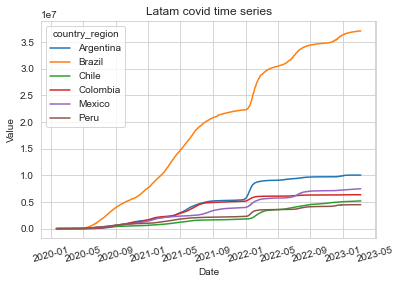

In [8]:
sns.lineplot(
    data=some_latam_countries_df,
    x="date",
    y="value",
    hue="country_region"
)

plt.xticks(rotation=15)
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Latam covid time series");



The line plot above visualizes the progression of confirmed COVID-19 cases over time for selected Latin American countries: Argentina, Brazil, Chile, Colombia, Mexico, and Peru. Key observations include:

- **Brazil's Trajectory:** Brazil's curve is markedly steeper than the others, suggesting a more rapid increase in the number of confirmed cases.
- **Other Countries' Trends:** Argentina, Chile, Colombia, Mexico, and Peru exhibit upward trends but at a less dramatic rate compared to Brazil.
- **Pandemic Spread:** Initially, all countries show nearly flat lines, indicating low numbers of confirmed cases. As time progresses, each country experiences an increase in cases, though the timing and rate of increase vary.

It is evident that Brazil has been the hardest hit among the depicted regions, with its line showing an exponential growth pattern. The use of a logarithmic scale on the y-axis helps in comparing the exponential growth rates despite the large differences in absolute numbers.


### Identifying Top Countries by Total COVID-19 Cases

- `top_countries_df = (`
  - We are starting a chain of operations on the `processed_covid_df` DataFrame, aiming to identify the top 20 countries with the highest total COVID-19 case counts.

- `.select_columns(["country_region", "value"])`
  - Select only the 'country_region' and 'value' columns, which represent the country names and the number of confirmed cases, respectively.

- `.groupby(["country_region"])`
  - Group the data by 'country_region' to perform aggregated calculations per country.

- `.aggregate("sum")`
  - Aggregate the confirmed cases by summing them up for each country, giving us the total number of confirmed cases per country.

- `.sort_values("value", ascending=False)`
  - Sort the countries in descending order of their total confirmed cases to bring the countries with the highest totals to the top.

- `.reset_index()`
  - Reset the index of the DataFrame after sorting, which is a common practice after groupby operations to maintain a clean DataFrame.

- `.head(20)`
  - Select the top 20 countries from the sorted list.

- `.transform_column(column_name="country_region", function=lambda x: "red" if x in countries else "lightblue", dest_column_name="color")`
  - Transform the 'country_region' column by applying a lambda function that assigns the color "red" to the countries specified in our earlier list (representing Latin American countries) and "lightblue" to all others. The result is stored in a new column called 'color'.
  
- `top_countries_df.head()`
  - Display the first few rows of the `top_countries_df` DataFrame to verify the transformations and see the top countries with the most confirmed cases.

This DataFrame, `top_countries_df`, will now contain the top 20 countries with the most confirmed COVID-19 cases, along with a color code that distinguishes selected Latin American countries from the rest. 


In [9]:
top_countries_df = (
    processed_covid_df
    .select_columns(["country_region", "value"])
    .groupby(["country_region"])
    .aggregate("sum")
    .sort_values("value", ascending=False)
    .reset_index()
    .head(20)
    .transform_column(
        column_name="country_region",
        function=lambda x: "red" if x in countries else "lightblue",
        dest_column_name="color"
    )
)

top_countries_df.head()

,country_region,value,color
0,US,53813184406,lightblue
1,India,29131119694,lightblue
2,Brazil,21182690594,red
3,France,16105911886,lightblue
4,Germany,13686043720,lightblue


### Top Countries by Total COVID-19 Cases with Color Coding

The table displayed shows the results of the processed DataFrame `top_countries_df`:

- `country_region`: The name of the country.
- `value`: The aggregated sum of confirmed COVID-19 cases for each country.
- `color`: A color code assigned to each country, with selected Latin American countries colored red and all others colored lightblue.

#### First Five Rows Analysis:
- The United States (`US`) leads with the highest total number of confirmed cases, followed by India.
- Brazil is the third on the list and is also the highest-ranked among the Latin American countries we've specifically marked; it is colored in red.
- France and Germany come in fourth and fifth, respectively, and are colored lightblue, indicating they are not part of the Latin American countries we're focusing on.


### Creating a Barplot for Top Countries by COVID-19 Cases

- `sns.barplot(data=top_countries_df, x="value", y="country_region", palette=top_countries_df.color)`:
  - This line creates a horizontal bar plot using Seaborn's `barplot` function.
  - The `data` parameter is set to `top_countries_df`, which is our DataFrame containing the top 20 countries with the highest total COVID-19 cases.
  - The `x` parameter represents the total number of confirmed cases (`value`), which will determine the length of the bars.
  - The `y` parameter represents the countries (`country_region`), which will be listed on the y-axis.
  - The `palette` parameter is set to the `color` column of `top_countries_df`, which applies our custom color coding (red for selected Latin American countries and lightblue for others) to the bars.

- `plt.xlabel("Value")` and `plt.ylabel("Country Region")`:
  - These commands set the labels for the x-axis and y-axis, respectively. "Value" indicates the total number of confirmed cases, and "Country Region" lists the names of the countries.

- `plt.title("Latam countries in a global context")`:
  - This sets the title of the plot, indicating that the visualized data compares the selected Latin American countries against other countries globally in terms of COVID-19 case counts.




/Users/ivanozono/anaconda3/envs/final_project/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ivanozono/anaconda3/envs/final_project/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


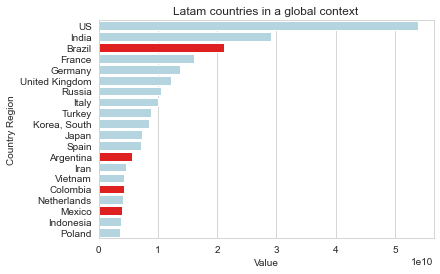

In [10]:
sns.barplot(
    data=top_countries_df,
    x="value",
    y="country_region",
    palette=top_countries_df.color
)

plt.xlabel("Value")
plt.ylabel("Country Region")
plt.title("Latam countries in a global context");



The barplot above illustrates the total confirmed COVID-19 cases for the top 20 countries globally, with a special emphasis on Latin American countries:

- **Scale and Impact:** The US, India, and Brazil show the largest bars, indicating the highest total confirmed cases. The scale is logarithmic, as evidenced by the `1e10` on the x-axis, which allows for a more digestible comparison of numbers that vary greatly in magnitude.

- **Color Coding:** Latin American countries are highlighted in red, making them easily distinguishable. Brazil, Argentina, Colombia, and Mexico are the Latin American countries that appear among the top 20 and are notably visible due to their red coloring.

- **Global Context:** The plot provides a clear visual context of how Latin American countries rank among other heavily impacted countries. Brazil is the most affected among them, followed by Argentina, Colombia, and Mexico.

- **Interpretation:** While the US and India are leading in total cases, the plot highlights that Brazil, as a Latin American country, also has a significant number of total cases, ranking third globally.


